# Project 2 - Michael Trumbull

## Part 1 - Regression on California house prices

#### Importing necessary packages

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

#### Importing data to be used

In [2]:
hdata = datasets.fetch_california_housing()

#### Print features of hdata

In [3]:
print(type(hdata))
Descr = hdata['DESCR']

data = hdata['data']
print("Shape of data: ", np.shape(data))

price = hdata['target']
print("Shape of price: ", np.shape(price))

names = hdata['feature_names']
print("Shape of names: ", np.shape(names))



<class 'sklearn.utils.Bunch'>
Shape of data:  (20640, 8)
Shape of price:  (20640,)
Shape of names:  (8,)


### Part A

#### Print interesting values for each variable

In [4]:
for i in range (0,8):
    print(names[i], ' minimum: ', min(data[:,i]))
    print(names[i], ' maximum: ', max(data[:,i]))
    print(names[i], ' mean: ', np.mean(data[:,i]))
    print()

MedInc  minimum:  0.4999
MedInc  maximum:  15.0001
MedInc  mean:  3.8706710029069766

HouseAge  minimum:  1.0
HouseAge  maximum:  52.0
HouseAge  mean:  28.639486434108527

AveRooms  minimum:  0.8461538461538461
AveRooms  maximum:  141.9090909090909
AveRooms  mean:  5.428999742190376

AveBedrms  minimum:  0.3333333333333333
AveBedrms  maximum:  34.06666666666667
AveBedrms  mean:  1.096675149606208

Population  minimum:  3.0
Population  maximum:  35682.0
Population  mean:  1425.4767441860465

AveOccup  minimum:  0.6923076923076923
AveOccup  maximum:  1243.3333333333333
AveOccup  mean:  3.0706551594363742

Latitude  minimum:  32.54
Latitude  maximum:  41.95
Latitude  mean:  35.63186143410853

Longitude  minimum:  -124.35
Longitude  maximum:  -114.31
Longitude  mean:  -119.56970445736432



### Part B

#### 2D plots of each variable vs price

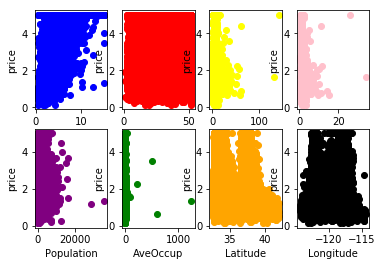

In [5]:
color = ['blue','red','yellow','pink','purple','green','orange','black']
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.plot(data[:,i-1],price,'o',color=color[i-1])
    plt.ylabel('price')
    plt.xlabel(names[i-1])
plt.show()

### Part C

#### Split data 

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(data,price,random_state=0)
print("xtrain: ", type(xtrain), np.shape(xtrain))
print("xtest: ", type(xtest), np.shape(xtest))
print("ytrain: ", type(ytrain), np.shape(ytrain))
print("ytest: ", type(ytest), np.shape(ytest))


xtrain:  <class 'numpy.ndarray'> (15480, 8)
xtest:  <class 'numpy.ndarray'> (5160, 8)
ytrain:  <class 'numpy.ndarray'> (15480,)
ytest:  <class 'numpy.ndarray'> (5160,)


#### Linear regression

In [7]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Initialize object
model1 = linear_model.LinearRegression()
model1.fit(xtrain,ytrain)
predict1 = model1.predict(xtest)

#Coefficients of ridge
coef1 = model1.coef_
print('Linear Regression - Coefficients: \n', coef1)
#Mean squared between test data and predicted data
mean1 = mean_squared_error(ytest, predict1)
print("Linear Regression - Mean squared error: ", mean1)
#Variance between test data and predicted data
rsq1 = r2_score(ytest, predict1)
print("Linear Regression - Variance score: ", rsq1)





Linear Regression - Coefficients: 
 [ 4.39091042e-01  9.59864665e-03 -1.03311173e-01  6.16730152e-01
 -7.63275197e-06 -4.48838256e-03 -4.17353284e-01 -4.30614462e-01]
Linear Regression - Mean squared error:  0.5404128061709104
Linear Regression - Variance score:  0.5911695436410469


#### Ridge

In [8]:

#Initialize object
model2 = linear_model.Ridge(alpha=.1)
model2.fit(xtrain,ytrain)
predict2 = model2.predict(xtest)

#Coefficients of ridge
print('Ridge - Coefficients: \n', model2.coef_)
#Mean squared between test data and predicted data
print("Ridge - Mean squared error: ", mean_squared_error(ytest, predict2))
#Variance between test data and predicted data
print("Ridge - Variance score: ", r2_score(ytest, predict2))

#print('\n Using standard scalar:')

#model2b = linear_model.Ridge(alpha=.1)
#scaler1 = StandardScaler().fit(xtrain,ytrain)
#model2b.fit(scaler1.transform(xtrain,ytrain))
#predict2b = model2b.predict(xtest)


#print('Standard Scaler - Ridge - Coefficients: \n', model2b.coef_)

#print("Standard Scaler - Ridge - Mean squared error: ", mean_squared_error(ytest, predict2b))

#print("Standard Scaler - Ridge - Variance score: ", r2_score(ytest, predict2b))

Ridge - Coefficients: 
 [ 4.39078479e-01  9.59886837e-03 -1.03287193e-01  6.16605161e-01
 -7.63176959e-06 -4.48846866e-03 -4.17351215e-01 -4.30610676e-01]
Ridge - Mean squared error:  0.5404138541483811
Ridge - Variance score:  0.5911687508302499


#### Lasso

In [9]:
#Initialize object
model3 = linear_model.Lasso(alpha=.1)
model3.fit(xtrain,ytrain)
predict3 = model3.predict(xtest)

#Coefficients of ridge
print('Lasso - Coefficients: \n', model3.coef_)
#Mean squared between test data and predicted data
print("Lasso - Mean squared error: ", mean_squared_error(ytest, predict3))
#Variance between test data and predicted data
print("Lasso - Variance score: ", r2_score(ytest, predict3))

Lasso - Coefficients: 
 [ 3.95666352e-01  1.53279870e-02 -0.00000000e+00  0.00000000e+00
  1.53002856e-05 -3.84935540e-03 -1.08253597e-01 -9.38537333e-02]
Lasso - Mean squared error:  0.6268338940798738
Lasso - Variance score:  0.5257906843590099


#### ElasticNet

In [10]:
#Initialize object
model4 = linear_model.ElasticNet(random_state=0)
model4.fit(xtrain,ytrain)
predict4 =model4.predict(xtest)

#Coefficients of ridge
print('ElasticNet - Coefficients: \n', model4.coef_)
#Mean squared between test data and predicted data
print("ElasticNet - Mean squared error: ", mean_squared_error(ytest, predict4))
#Variance between test data and predicted data
print("ElasticNet - Variance score: ", r2_score(ytest, predict4))

ElasticNet - Coefficients: 
 [ 2.56818339e-01  1.14017469e-02  0.00000000e+00 -0.00000000e+00
  8.18839699e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
ElasticNet - Mean squared error:  0.7730208160272881
ElasticNet - Variance score:  0.4151980682495934


### Part D

Tune parameters with GridsearchCV

In [15]:
from sklearn.grid_search import GridSearchCV

#Ridge
alphas = np.array([1,0.7,0.5,0.3,.15,0.1,.05,0.01])

model = linear_model.Ridge(alpha=.1)

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(xtrain, ytrain)

print('Best score: ', grid.best_score_)
print('Best estimator: alpha = ', grid.best_estimator_.alpha)
a = grid.best_estimator_.alpha

model2 = linear_model.Ridge(alpha=a)
model2.fit(xtrain,ytrain)
predict2 = model2.predict(xtest)

#Coefficients of ridge
print('After using GridsearchCV')

#Variance between test data and predicted data
print("Ridge - Variance score: ", r2_score(ytest, predict2))

Best score:  0.6081707442896801
Best estimator: alpha =  1.0
After using GridsearchCV
Ridge - Variance score:  0.591161593074793


In [16]:
#Lasso
alphas = np.array([1,0.7,0.5,0.3,.15,0.1,.05,0.01])

model = linear_model.Lasso(alpha=.1)

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(xtrain, ytrain)

print('Best score: ', grid.best_score_)
print('Best estimator: alpha = ', grid.best_estimator_.alpha)
a = grid.best_estimator_.alpha

model2 = linear_model.Ridge(alpha=a)
model2.fit(xtrain,ytrain)
predict2 = model2.predict(xtest)

#Coefficients of ridge
print('After using GridsearchCV')

#Variance between test data and predicted data
print("Lasso - Variance score: ", r2_score(ytest, predict2))

Best score:  0.6057300074891139
Best estimator: alpha =  0.01
After using GridsearchCV
Lasso - Variance score:  0.5911694643825318


In [20]:
#Elastic Net
alphas = np.array([1,0.7,0.5,0.3,.15,0.1,.05,0.01])

model = linear_model.ElasticNet()

grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(xtrain, ytrain)

print('Best score: ', grid.best_score_)
print('Best estimator: alpha = ', grid.best_estimator_.alpha)
a = grid.best_estimator_.alpha

model2 = linear_model.Ridge(alpha=a)
model2.fit(xtrain,ytrain)
predict2 = model2.predict(xtest)

#Coefficients of ridge
print('After using GridsearchCV')

#Variance between test data and predicted data
print("Ridge - Variance score: ", r2_score(ytest, predict2))

Best score:  0.6074991952625233
Best estimator: alpha =  0.01
After using GridsearchCV
Ridge - Variance score:  0.5911694643825318


### Part E

Visualize coefficients of resulting models

## Part 2 - Classification on the Covertype dataset

In [21]:
covdata = datasets.fetch_covtype()
print(type(covdata))
Descr = covdata['DESCR']
print(Descr)

data = covdata['data']
print('data: ', type(data), np.shape(data))
target = covdata['target']
print('target: ', type(target), np.shape(target))


#From website
columns = ['Elevation','Aspect','Slope','Horizontal Dist to Hydrology','Vertical Dist to Hydrology',
           'Horizontal Dist to Roadways','Hillshade 9 am','Hillshade noon','Hillshade 3 pm','Horizontal Dist to Firepoints',
          'Wilderness area 1','Wilderness area 2','Wilderness area 3','Wilderness area 4','Soil Type *40']
#The target is the binary of cover type in the forest

<class 'sklearn.utils.Bunch'>
Forest covertype dataset.

A classic dataset for classification benchmarks, featuring categorical and
real-valued features.

The dataset page is available from UCI Machine Learning Repository

    http://archive.ics.uci.edu/ml/datasets/Covertype

Courtesy of Jock A. Blackard and Colorado State University.

data:  <class 'numpy.ndarray'> (581012, 54)
target:  <class 'numpy.ndarray'> (581012,)


### A - Visualize univariant dist of each variable

#Visualizing first 8 variables

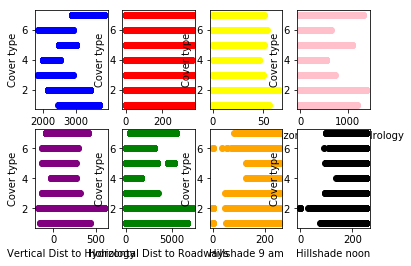

In [22]:
color = ['blue','red','yellow','pink','purple','green','orange','black']
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.plot(data[:,i-1],target,'o',color=color[i-1])
    plt.ylabel('Cover type')
    plt.xlabel(columns[i-1])
plt.show()

### B - train and test

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(data,target,random_state=0)
print("xtrain: ", type(xtrain), np.shape(xtrain))
print("xtest: ", type(xtest), np.shape(xtest))
print("ytrain: ", type(ytrain), np.shape(ytrain))
print("ytest: ", type(ytest), np.shape(ytest))

xtrain:  <class 'numpy.ndarray'> (435759, 54)
xtest:  <class 'numpy.ndarray'> (145253, 54)
ytrain:  <class 'numpy.ndarray'> (435759,)
ytest:  <class 'numpy.ndarray'> (145253,)


Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

#Initialize object
m1 = linear_model.LogisticRegression()
m1.fit(xtrain,ytrain)
p1 = m1.predict(xtest)

#Coefficients of ridge

#c1 = m1.coef_
#print('Linear Regression - Coefficients: \n', c1)

#Mean squared between test data and predicted data
mean = mean_squared_error(ytest, p1)
print("Linear Regression - Mean squared error: ", mean)
#Variance between test data and predicted data
rsq = r2_score(ytest, p1)
print("Linear Regression - Variance score: ", rsq)

Linear Regression - Mean squared error:  1.6251368302203741
Linear Regression - Variance score:  0.1654446741801675


Linear support vector machine

In [25]:
from sklearn.svm import LinearSVC
m2 = LinearSVC(random_state=0, tol=1e-5)
m2.fit(xtrain,ytrain)
p2 = m2.predict(xtest)
#Mean squared between test data and predicted data
mean = mean_squared_error(ytest, p2)
print("Linear Regression - Mean squared error: ", mean)
#Variance between test data and predicted data
rsq = r2_score(ytest, p1)
print("Linear Regression - Variance score: ", rsq)

Linear Regression - Mean squared error:  10.549778662058616
Linear Regression - Variance score:  0.1654446741801675
